In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [48]:
a = np.array([[0,0.015625],
              [0.015625*.866,0.015625*1.5],
              [0.015625*2*.866,0.015625],
              [0.015625*2*.866,0],
              [0.015625*.866,0.015625*-.5],
              [0,0]])
a1=np.array([[0,0.015625],
              [0.015625*.866,0.015625*1.5],
              [0.015625*2*.866,0.015625],
             [0.015625*.866,0.015625*.5]])
a2=np.array([[0.015625*2*.866,0.015625],
              [0.015625*2*.866,0],
              [0.015625*.866,0.015625*-.5],
              [0.015625*.866,0.015625*.5]])
a3=np.array([[0,0.015625],
              [0.015625*.866,0.015625*.5],
              [0.015625*.866,0.015625*-.5],
              [0,0]])

        

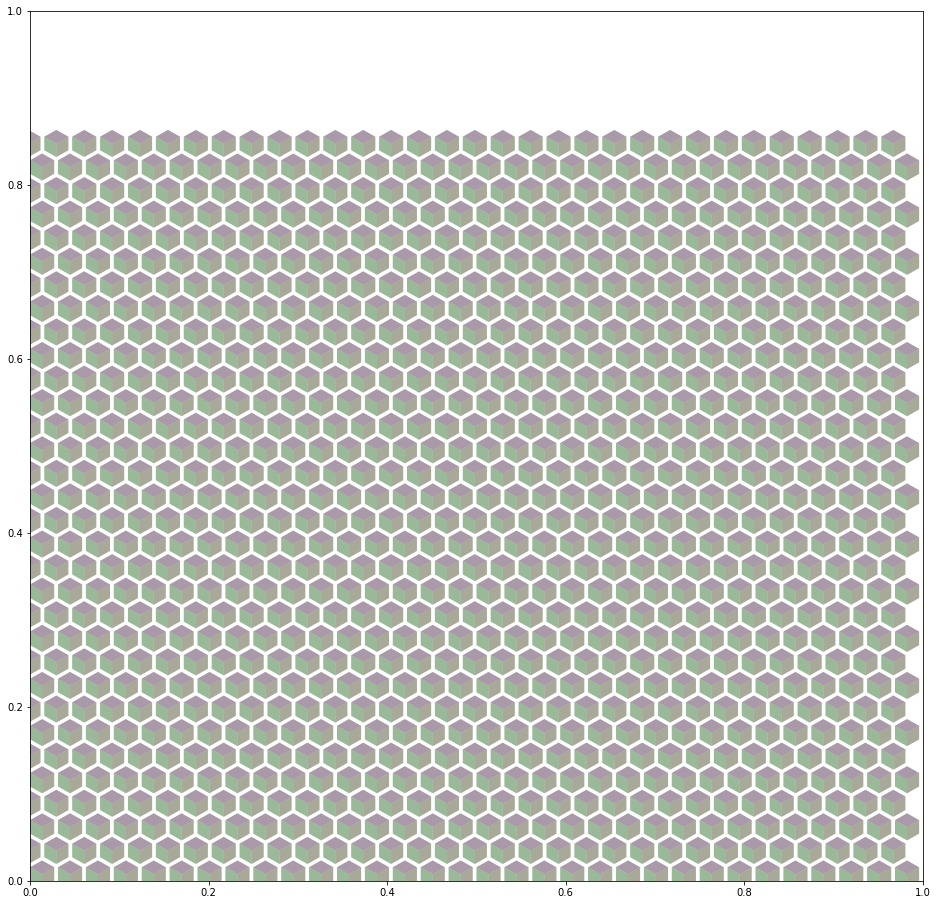

In [72]:
fig, ax = plt.subplots(figsize=(16,16))
colors = []
col1=[.16,0,.16]
col2=[.16,.16,0]
col3=[0,.32,0]
patches = []
for i in range(32):
    for j in range(32):
        if i%2==0:
            b=np.array([[2*j*0.015625,i*1.734*0.015625],
                       [2*j*0.015625,i*1.734*0.015625],
                       [2*j*0.015625,i*1.734*0.015625],
                       [2*j*0.015625,i*1.734*0.015625]])
                        if j%6>0|j%6<4:
                            colcol=[-.1,-.1,-.1 ]
                        elif j%6=4:
                            colcol=[-.05,-.05,-.05]
                        elif j%6=5:
                            colcol=[0,0,0]
                        elif j%6=0:
                            colcol=[-.05,-.05,-.05]
        elif i%2==1:
            b= np.array([[2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                       [2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                       [2*j*0.015625-.983*0.015625,i*1.734*0.015625],
                       [2*j*0.015625-.983*0.015625,i*1.734*0.015625]])
                        if j%3==0:
                           colcol=[-.1,-.1,-.1] 
                        elif j%3 > 0:
                            colcol=[-.05,-.05,-.05]
        c1=a1+b
        c2=a2+b
        c3=a3+b
        rowcol=[(32-i)/48,(32-2*((i-16)**2)**.5)/48,i/48]
        polygon1 = Polygon(c1, True)
        patches.append(polygon1)
        colors.append(tuple(col1+rowcol+colcol))
        polygon2 = Polygon(c2, True)
        patches.append(polygon2)
        colors.append(tuple(col1+rowcol+colcol))
        polygon3 = Polygon(c3, True)
        patches.append(polygon3)
        colors.append(tuple(col1+rowcol+colcol))

p = PatchCollection(patches, facecolors=colors,cmap=matplotlib.cm.jet, alpha=0.4)
ax.add_collection(p)
plt.show()

In [64]:
colors

[]

In [62]:
col1

array([0.83333333, 1.        , 0.1       ])

In [67]:
'#%02x%02x%02x' % (col1)

TypeError: %x format: an integer is required, not float

In [66]:
'#%02x%02x%02x' % (0, 128, 64)

'#008040'

In [80]:
for i in range(32):
    rowcol.append([(32-i)/32,(32-2*((i-16)**2)**.5)/32,i/32])
rowcol
        

[0.03125,
 0.0625,
 0.96875,
 [1.0, 0.0, 0.0],
 [0.96875, 0.0625, 0.03125],
 [0.9375, 0.125, 0.0625],
 [0.90625, 0.1875, 0.09375],
 [0.875, 0.25, 0.125],
 [0.84375, 0.3125, 0.15625],
 [0.8125, 0.375, 0.1875],
 [0.78125, 0.4375, 0.21875],
 [0.75, 0.5, 0.25],
 [0.71875, 0.5625, 0.28125],
 [0.6875, 0.625, 0.3125],
 [0.65625, 0.6875, 0.34375],
 [0.625, 0.75, 0.375],
 [0.59375, 0.8125, 0.40625],
 [0.5625, 0.875, 0.4375],
 [0.53125, 0.9375, 0.46875],
 [0.5, 1.0, 0.5],
 [0.46875, 0.9375, 0.53125],
 [0.4375, 0.875, 0.5625],
 [0.40625, 0.8125, 0.59375],
 [0.375, 0.75, 0.625],
 [0.34375, 0.6875, 0.65625],
 [0.3125, 0.625, 0.6875],
 [0.28125, 0.5625, 0.71875],
 [0.25, 0.5, 0.75],
 [0.21875, 0.4375, 0.78125],
 [0.1875, 0.375, 0.8125],
 [0.15625, 0.3125, 0.84375],
 [0.125, 0.25, 0.875],
 [0.09375, 0.1875, 0.90625],
 [0.0625, 0.125, 0.9375],
 [0.03125, 0.0625, 0.96875]]